<p style="align: center;"><img align=center src="https://cdnb.artstation.com/p/assets/covers/images/060/407/559/large/vahid-ghobadi-arfai-vahid-ghobadi-arfai-lo.jpg?1678483232" width=300 height=320/></p>
<h3 style="text-align: center;"><b>Семинар №9 ФЭФМ МФТИ</b></h3>

# Повторим лекционный материал

Односвязный список — это линейная и однонаправленная структура данных, в которой данные сохраняются на узлах, и каждый узел связан ссылкой со своим следующим узлом. Каждый узел содержит поле данных и ссылку на следующий узел. Односвязные списки можно перемещать только в одном направлении, тогда как двусвязные списки можно перемещать в обоих направлениях.

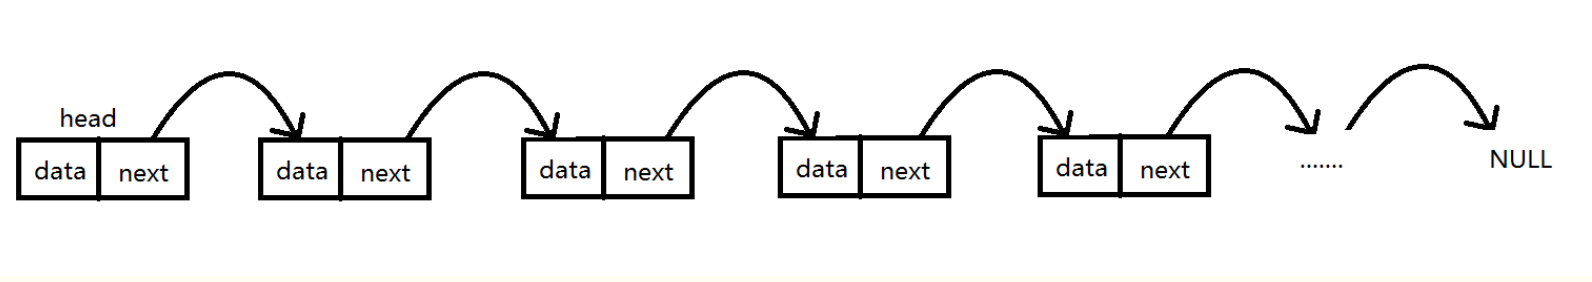

In [ ]:
class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None

'''
Этот класс представляет собой отдельный узел в связанном списке. Узел содержит два атрибута:

data: хранит значение узла (в этом случае целое число).
next: ссылка на следующий узел в списке. Если узел является последним в списке, то next равен None.
'''

class LinkedList:
    def __init__(self):
        self.head = None

    def insert(self, data):
        if not self.head:
            self.head = Node(data)
        else:
            current = self.head
            while current.next:
                current = current.next
            current.next = Node(data)

    def print_list(self):
        current = self.head
        while current:
            print(current.data, end=" ")
            current = current.next
        print()

'''
Нужно создать сам список.
Если он пуст head = None, 
то создаем новый узел и помещаем в начало списка. 
Если уже есть узлы, проходим до последнего узла и добавляем к нему новый узел.
'''
'''
print_listметод: выводит содержимое связного списка. Он начинает с головы списка и проходит по списку, выводя значение каждого узла, пока не достигнет конца списка (None).


Этот класс представляет собой сам связный список. Он содержит методы для добавления новых узлов в список и вывода содержимого списка.


'''

linked_list = LinkedList()
linked_list.insert(1)
linked_list.insert(2)
linked_list.insert(3)
linked_list.print_list()  # Выведет: 1 2 3

Двусвязный список — это тип связного списка, в котором каждый узел, помимо значения, содержит указатели на предыдущий и следующий элементы. Это позволяет перебирать элементы как в прямом, так и в обратном порядке.

Одним из основных недостатков двусвязного списка является то, что вам нужно больше места в памяти для хранения одной дополнительной ссылки для каждого узла. 

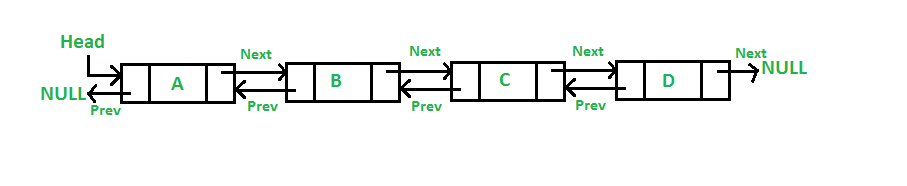

In [ ]:
class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None
        self.prev = None

class DoublyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None

    def insert(self, data):
        if not self.head:
            self.head = Node(data)
            self.tail = self.head
        else:
            new_node = Node(data)
            new_node.prev = self.tail
            self.tail.next = new_node
            self.tail = new_node

    def print_list(self):
        current = self.head
        while current:
            print(current.data, end=" ")
            current = current.next
        print()

    def print_reverse(self):
        current = self.tail
        while current:
            print(current.data, end=" ")
            current = current.prev
        print()

doubly_linked_list = DoublyLinkedList()
doubly_linked_list.insert(1)
doubly_linked_list.insert(2)
doubly_linked_list.insert(3)
doubly_linked_list.print_list() 
doubly_linked_list.print_reverse()  

Стек (англ. stack — стопка; читается стэк) — абстрактный тип данных, представляющий собой список элементов, организованных по принципу LIFO (англ. last in — first out, «последним пришёл — первым вышел»).

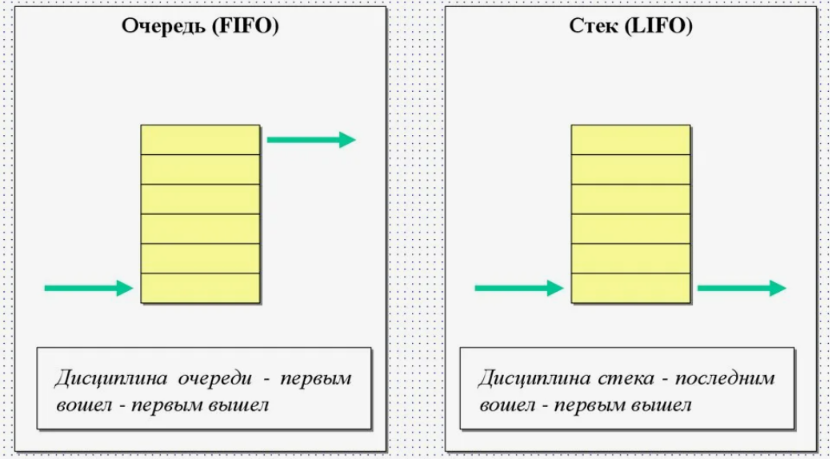

# Декораторы

In [ ]:
'''
Декораторы — это, по сути, "обёртки", которые дают нам возможность изменить поведение функции, не изменяя её код. 

Любая достаточно общая функциональность, которую можно «прикрепить» 
к поведению существующего класса или функции, является отличным примером 
использования декораторов. Сюда входит:
обеспечение контроля доступа и аутентификации,
инструментарий и функции управления временем,
ограничение скорости,
кэширование и многое другое.
'''
def null_decorator(func):
    return func


def greet():
    return 'Hello!'


greet = null_decorator(greet)


greet()

In [ ]:
@null_decorator
def greet():
    return 'Hello!'


greet()

In [ ]:
def my_decorator(function_to_decorate):
     # Внутри себя декоратор определяет функцию-"обёртку". Она будет обёрнута вокруг декорируемой,
     # получая возможность исполнять произвольный код до и после неё.
    def wrapper():
        print("Я - код, который отработает до вызова функции")
        function_to_decorate() # Сама функция
        print("А я - код, срабатывающий после")
     # Вернём эту функцию
    return wrapper
    
def alone_function():
     print("Наша функция для изменения")

# Однако, чтобы изменить её поведение, мы можем декорировать её, то есть просто передать декоратору,
# который обернет исходную функцию в любой код, который нам потребуется, и вернёт новую,
# готовую к использованию функцию:
function_decorated = my_decorator(alone_function)
function_decorated()

In [ ]:
def uppercase(func):
    def wrapper():
        result = func()
        modified_result = result.upper()
        return modified_result
    return wrapper

@uppercase
def greet():
    return 'Hello!'

greet()

In [ ]:
def add_surcharge(method_to_decorate):
    def wrapper(self, cost):
        extra = 100
        total_cost = cost + extra
        return method_to_decorate(self, total_cost)
    return wrapper



'''
где-то дальше по коду
'''
class Price:
    def __init__(self):
        pass

    @add_surcharge
    def sayprice(self, cost):
        print(f"Итоговая стоимость {cost} рублей")

def main():
    cost = int(input("Введите стоимость: "))
    p = Price()
    p.sayprice(cost)

main()

Вложенная функция — это функция, которая определяется внутри другой функции. Вложенная функция имеет доступ к переменным внешней функции и может их использовать. 

In [ ]:
def outer(x):
    def inner(y):
        return x + y
    return inner

add_five = outer(5)
print(add_five(3)) 

Декоратор — это специальная функция, которая принимает другую функцию в качестве аргумента и расширяет её поведение без изменения исходного кода.

Вложенные функции используются для организации кода, а декораторы используются для расширения поведения функций.
Вложенные НЕ меняют поведение внешней функции, декораторы МЕНЯЮТ поведение декорируемой функции.
Вложенные функции ИМЕЮТ доступ к переменным внешней функции,декораторы НЕ имеют доступа к переменным декорируемой функции.

### более интересные примеры

In [ ]:
import time

def timer(func):
    def wrapper(*args):
        start_time = time.time()
        result = func(*args)
        end_time = time.time()
        print(f" функция {func.__name__} затратила {end_time - start_time} секунд на выполнение")
        return result
    return wrapper

@timer
def zaderzhka():
    time.sleep(5)

zaderzhka()

In [ ]:
def timer(func):
    def wrapper(*args):
        start_time = time.time()
        result = func(*args)
        end_time = time.time()
        print(f"Функция {func.__name__} затратила {end_time - start_time} секунд на выполнение")
        return result
    return wrapper

@timer
def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

factorial(100)

In [ ]:
def timer(func):
    def wrapper(*args):
        start_time = time.perf_counter()
        result = func(*args)
        end_time = time.perf_counter()
        print(f"Функция {func.__name__} затратила {end_time - start_time} секунд на выполнение")
        return result
    return wrapper

@timer
def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

factorial(100)

In [ ]:
def outer():
    count = 0
    def inner():
        nonlocal count
        count += 1
        return count
    return inner

counter = outer()
'''
вызывает ранее определенные переменные в ближайшей
области видимости, исключая глобальную
'''
print(counter())  
print(counter()) 
print(counter()) 

In [ ]:
def iterations(func):
    def wrapper(*args):
        print(f"Внимание! Вызвана функция {func.__name__} с аргументами {args}")
        result = func(*args)
        return result
        print(f"Результат функции {func.__name__}: {result}")
    return wrapper

@iterations
def function(n):
    j=1
    for i in range(1, n+1):
        print(f"Итерация {i}:")
        j *=i
        print(f"Выполняю итерацию № {i}...")
        print(j)

function(5)


In [ ]:
def talk():
    age = int(input("Введите ваш возраст: "))
    def hello():
        return 'Привет'
    def hello_polite():
        return 'Здравствуйте'
    if age <= 30:
        return hello()
    else:
        return hello_polite()

talk()

In [ ]:
def age_decorator(func):
    def wrapper():
        age = int(input("Введите ваш возраст: "))
        if age <= 30:
            return func()
        else:
            return "Здравствуйте"
    return wrapper

@age_decorator
def hello():
    return "Привет"

print(hello())

# Запись выражения

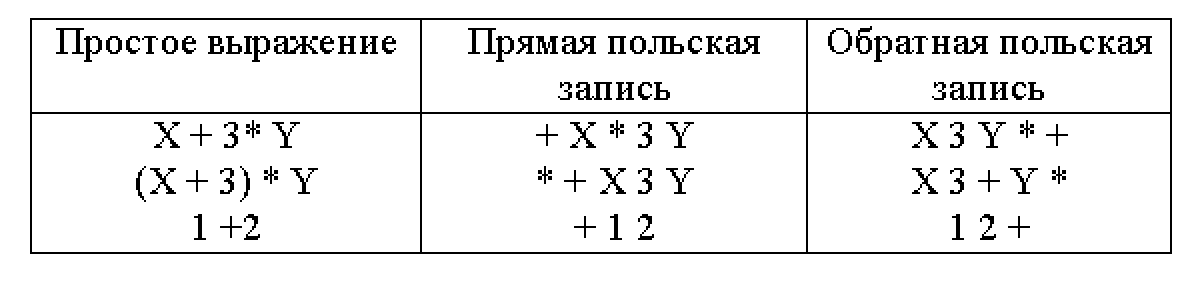

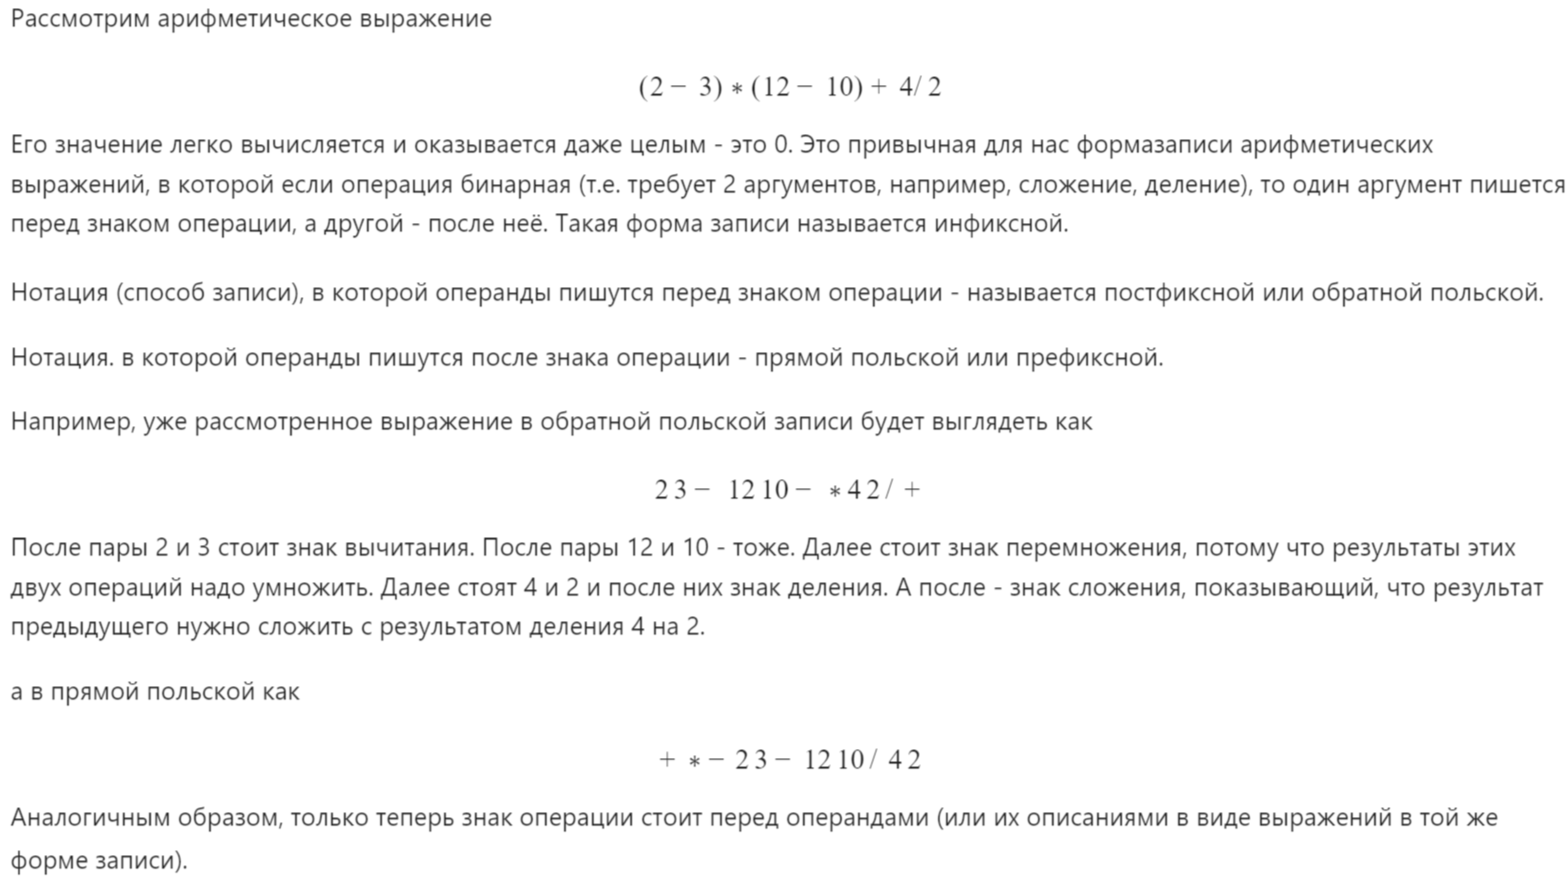

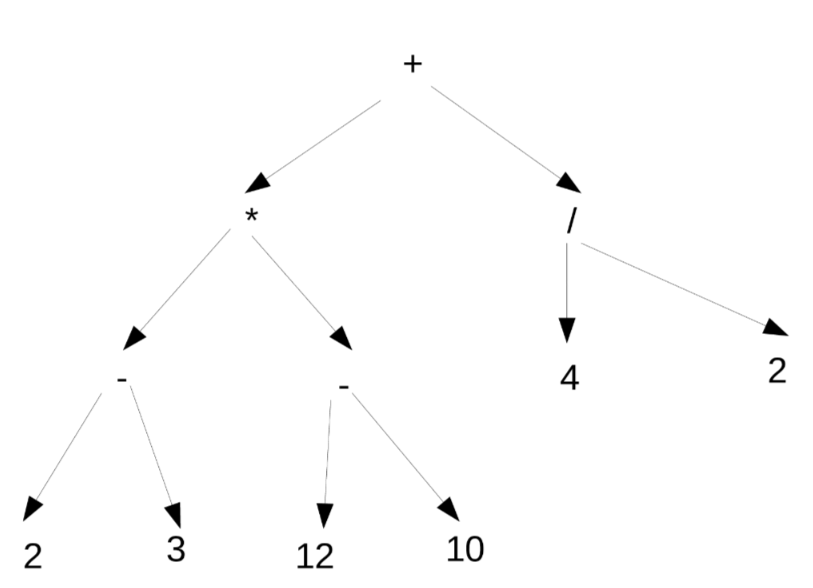

Напишите функцию, переводящую произвольное выражение
в прямую и обратную польские нотации.

Разобьем выражение на числа (операнды) и операции над ними.
Сначала посмотрим на обратную польскую запись:
Нужен стек для хранения операций.
Дальше пробегаем по выражению слева направо и выполняем следующие действия:
Если встречаем операнд, добавляем его в выходное выражение.
Если мы встречаем операцию, мы выталкиваем из стека все операции с приоритетом, не меньшим, чем у текущей операции, 
и добавляем их в выходное выражение. Затем мы добавляем текущую операцию в стек.
Если встречаем открывающую скобку, добавляем ее в стек.
Если мы встречаем закрывающую скобку, мы выталкиваем из стека все операции до открывающей скобки и добавляем их в выходное выражение.
После прохождения по всему выражению мы выталкиваем из стека все оставшиеся операции и добавляем их в выходное выражение.


Для перевода в прямую польскую нотацию мы можем использовать тот же алгоритм, но с некоторыми изменениями:
Когда мы добавляем операцию в выходное выражение, мы добавляем её перед операндами, а не после них.
Когда мы выталкиваем операцию из стека, мы добавляем её перед операндами в выходном выражении.

In [ ]:
str = 'Коля, Даша, Инна, Дима, Рома, Наташа'
print(str.split())

In [ ]:
str = 'bear,pig,rabbit,donkey,owl,tiger,kangaroo'
print(str.split(','))

In [ ]:
# опеределим приоритетность операторов
precedence = {
    '+': 1,
    '-': 1,
    '*': 2,
    '/': 2,
    '^': 3
}


def to_rpn(expression):
    # стек для хранения операторов
    stack = []
    # список для хранения выражения в обратной польской нотации
    rpn = []

    # Разделим выражение
    tokens = expression.split()

    for token in tokens:
        # Если токен является операндом, добавим его к выражению в обратной польской нотации
        if token not in precedence and token not in ['(', ')']:
            rpn.append(token)
        # Если токен является оператором, вытолкним из стека операторы с более высоким или равным приоритетом
        elif token in precedence:
            while stack and stack[-1] in precedence and precedence[stack[-1]] >= precedence[token]:
                rpn.append(stack.pop())
            stack.append(token)
        # Если токен является левой скобкой, добавим ее в стек
        elif token == '(':
            stack.append(token)
        # Если токен является правой скобкой, вытолкнем из стека операторы до левой скобки
        elif token == ')':
            while stack and stack[-1]!= '(':
                rpn.append(stack.pop())
            # Удалим левую скобку из стека
            stack.pop()

    # Вытолкните из стека любые оставшиеся операторы и добавьте их к выражению в обратной польской нотации
    while stack:
        rpn.append(stack.pop())

    return rpn

expression = "( 2 - 3 ) *  ( 12 - 10 ) + 4 / 2"
rpn_expression = to_rpn(expression)
print("Выражение в обратной польской нотации:", rpn_expression)

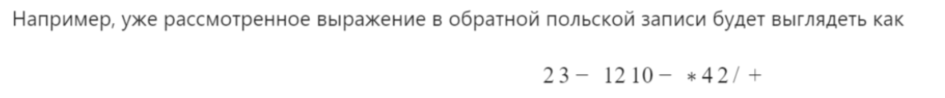


Стековый калькулятор - это устройство (реальное или виртуальное), которрое вычисляет значения арифметических выражений , записанный в постфиксной форме. Стековым он называется по понятным причинам: если нам встречается число - мы должны поместить его в стек; если знак операции - мы должны достать из стека столько чиссел, сколько необходимо для выполнения данной операции. Именно так и работает т.н. математический сопроцессор (например, в INtel8086+AMD64) - часть ЦП, отвечающая за операции над числами с плавающей запятой.

In [ ]:
import math
import operator

ops = {'+': operator.add,
       '-': operator.sub,
       '*': operator.mul,
       '/': operator.truediv,
       '^': operator.pow,
       'sin': math.sin,
       'tan': math.tan,
       'cos': math.cos,
       'pi': math.pi}

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass

def calculate(equation):
    stack = []
    result = 0
    for token in equation:
        if is_number(token):
            stack.insert(0, token)
        else:
            if len(stack) < 2:
                print('Error: insufficient values in expression')
                break
            else:
                print('stack: %s' % stack)
                if len(token) == 1:
                    n1 = float(stack.pop(1))
                    n2 = float(stack.pop(0))
                    result = ops[token](n1, n2)
                    stack.insert(0, str(result))
                else:
                    n1 = float(stack.pop(0))
                    result = ops[token](math.radians(n1))
                    stack.insert(0, str(result))
    return result

def main():
    running = True
    while running:
        equation = input('enter the equation: ').split(' ')
        answer = calculate(equation)
        print('RESULT: %f' % answer)
        again = input('\nEnter another? ')[0].upper()
        if again != 'Y':
            running = False

if __name__ == '__main__':
    main()

# Шифры

Для хранения и передачи секретных данных требуется либо использовать защищённый канал связи, либо обеспечить шифрование самого сообщения, чтобы даже при его перехвате злоумышленник не смог его прочитать. Наука о шифровании данных называется криптография. (Существует ещё вариант сокрытия самого факта передачи информации — стеганография.)

Атбаш — это шифр простой замены, использованный для еврейского алфавита и получивший оттуда своё название. Шифрование происходит заменой первой буквы алфавита на последнюю, второй на предпоследнюю и так далее.

Для русского алфавита таблица замен:

|а|б|в|г|д|е|ё|ж|з|и|й|к|л|м|н|о|п|р|с|т|у|ф|х|ц|ч|ш|щ|ъ|ы|ь|э|ю|я|

|я|ю|э|ь|ы|ъ|щ|ш|ч|ц|х|ф|у|т|с|р|п|о|н|м|л|к|й|и|з|ж|ё|е|д|г|в|б|а|

Данный шифр тривиален для взлома, поскольку у него нет ключа. Если криптоаналитику известно, что текст зашифрован этим шифром, то он сразу применяет алгоритм дешифрования, эквивалентный шифрованию.

In [ ]:
class Atbash:
	    alphabet = "абвгдеёжзийклмнопрстуфхцчшщъыьэюя"

	    def __init__(self):
	        lowercase_code = {x: y for x, y in zip(self.alphabet, self.alphabet[::-1])}
	        uppercase_code = {x.upper(): y.upper() for x, y in zip(self.alphabet, self.alphabet[::-1])}
            #каждую заглавную букву тоже нужно обработать
	        self._encode = lowercase_code
	        self._encode.update(uppercase_code)

	    def encode(self, text):
	        return ''.join([self._encode.get(char, char) for char in text])
'''
self._encode.get(char, char): Этот метод словаря self._encode возвращает значение, соответствующее ключу char, если такой ключ существует в словаре. Если ключа нет, он возвращает значение char по умолчанию.
[... for char in text]: Это генератор списка, который создает список из значений, полученных из словаря self._encode для каждой буквы char в строке text.
''.join(...): Этот метод соединяет все элементы списка в одну строку, используя пустую строку '' в качестве разделителя.
'''
cipher = Atbash()
line = input()
while line != '.':
    print(cipher.encode(line))
    line = input()

Жцко Иъчяоа — вмр эцы жцкоя прынмясрэфц, э фрмрорт фяшыдх нцтэру э рмфодмрт мъфнмъ чятъсаъмна нцтэрурт, сяйрыаёцтна ся съфрмрорт прнмрассрт зцнуъ прчцицх уъэъъ цуц пояэъъ съьр э яукяэцмъ. Сяпоцтъо, э жцкоъ нр ныэцьрт эпояэр ся 3, Я юдуя юд чятъсъся ся Ь, Ю нмясъм Ы, ц мяф ыяуъъ.

Жцко сячэяс э зънмг оцтнфрьр цтпъоямроя Ьяа Буца Иъчяоа, цнпругчрэяэжъьр ъьр ыуа нъфоъмсрх пъоъпцнфц нр нэрцтц ьъсъояуятц.

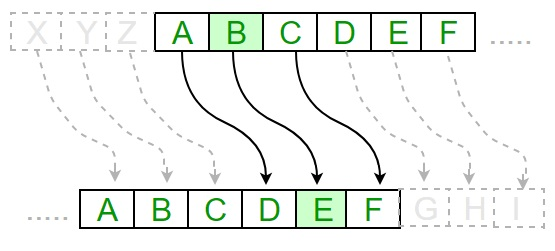

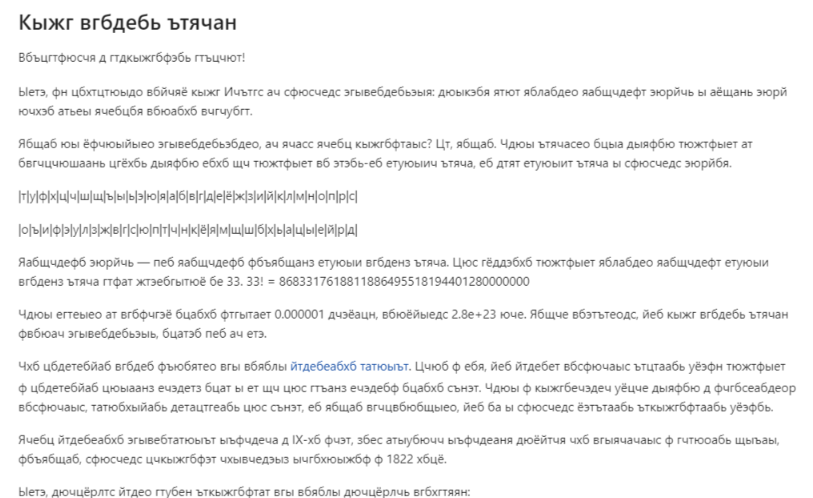

первое слово явно обозначает слово шифр. тогда: 
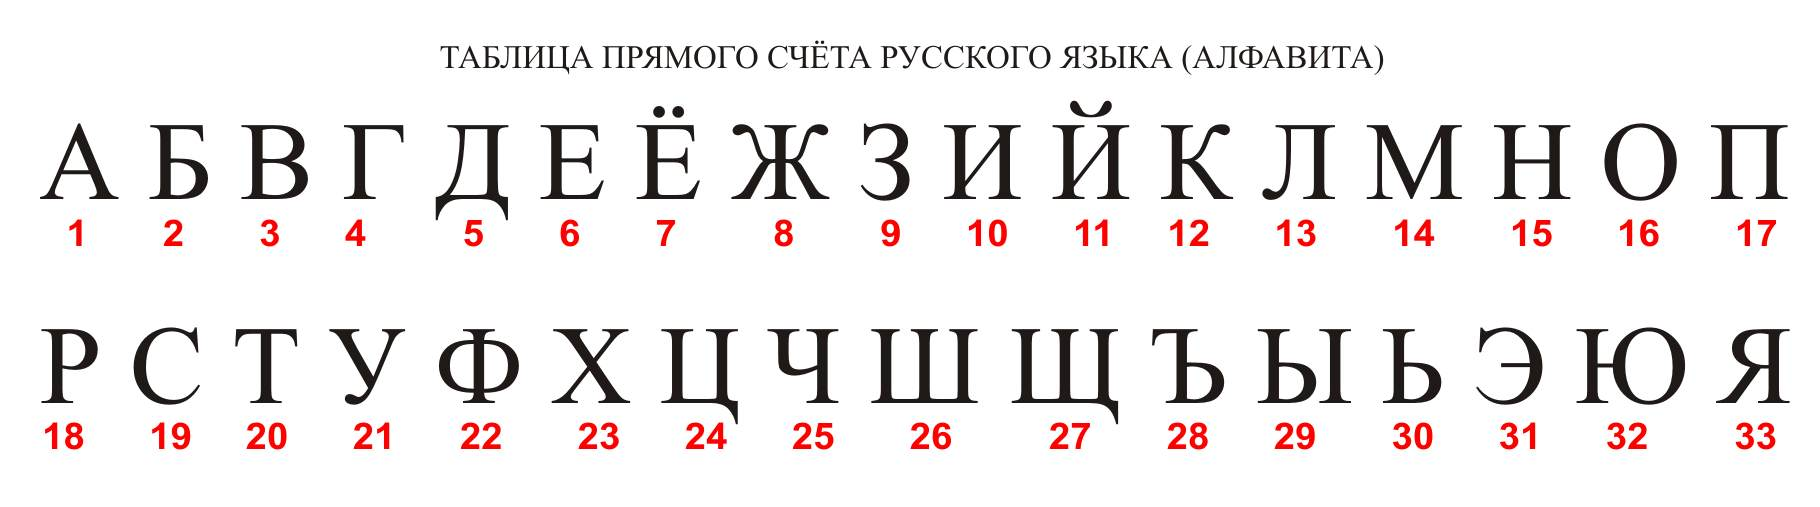

In [ ]:
def caesar_decrypt(text, key):
    alphabet = "яюэьыъщшчцхфутсрпонмлкйизжёедгвба"
    decrypted_text = ""
    for char in text:
        if char.isalpha():
            index = alphabet.index(char.lower())
            decrypted_text += alphabet[(index - key) % len(alphabet)]
        else:
            decrypted_text += char
    return decrypted_text

text = """ Кыжг
"""

for key in range(1, 33):
    decrypted_text = caesar_decrypt(text, key)
    print(f"Ключ: {key}")
    print(decrypted_text)
    print()

In [ ]:
def caesar_decrypt(text, key):
    alphabet = "яюэьыъщшчцхфутсрпонмлкйизжёедгвба"
    decrypted_text = ""
    for char in text:
        if char.isalpha():
            if char.lower() in alphabet:
                index = alphabet.index(char.lower())
                decrypted_text += alphabet[(index - key) % len(alphabet)]
            else:
                decrypted_text += char  # игнорируем букву, если она не в алфавите
        else:
            decrypted_text += char
    return decrypted_text

text = """Кыжг вгбдебь ътячан
Вбъцгтфюсчя д гтдкыжгбфэбь гтъцчют

Ыетэ, фн цбхтцтюыдо вбйчяё кыжг Ичътгс ач сфюсчедс эгывебдебьэыя: дюыкэбя ятют яблабдео яабщчдефт эюрйчь ы аёщань эюрй ючхэб атьеы ячебцбя вбюабхб вчгчубгт.

Ябщаб юы ёфчюыйыео эгывебдебьэбдео, ач ячасс ячебц кыжгбфтаыс? Цт, ябщаб. Чдюы ътячасео бцыа дыяфбю тюжтфыет ат бвгчцчюшаань цгёхбь дыяфбю ебхб щч тюжтфыет вб этэбь-еб етуюыич ътяча, еб дтят етуюыит ътяча ы сфюсчедс эюрйбя.

"""

key = 14
decrypted_text = caesar_decrypt(text, key)
print(decrypted_text)

In [ ]:
def caesar_encrypt(text, key):
    alphabet = "абвгдеёжзийклмнопрстуфхцчшщъыьэюя"
    encrypted_text = ""
    for char in text:
        if char.isalpha():
            index = alphabet.index(char.lower())
            encrypted_text += alphabet[(index + key) % len(alphabet)]
        else:
            encrypted_text += char
    return encrypted_text

text = "да"
key = 2
encrypted_text = caesar_encrypt(text, key)
print(encrypted_text)

Шифр частотного анализа. Частотный анализ — один из методов криптоанализа, который основывается на предположении о существовании нетривиального статистического распределения отдельных символов и их последовательностей в открытом тексте и шифротексте.

Шифр Виженера представляет собой последовательность шифров Цезаря с изменяющимися коэффициентами сдвига, зависисящими от ключа. Сервис позволяет зашифровать и расшифровать тексты на кириллице и латинице с учетом регистра букв и дополнительных небуквенных символов. Ключ должен содержать меньше символов, чем кодируемое сообщение.

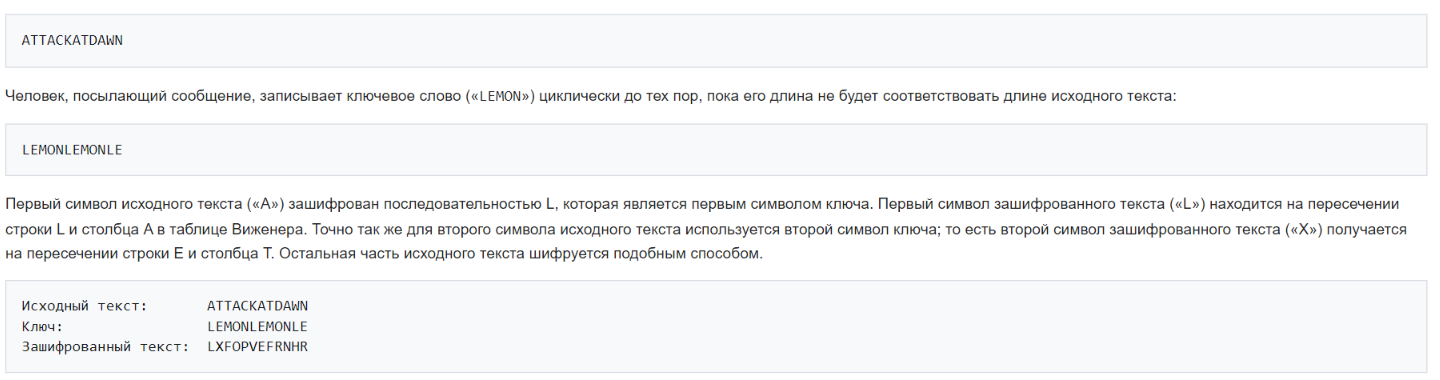

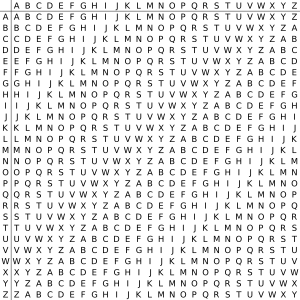